In [17]:
import os
import argparse
import train_static_ML
%matplotlib inline

#### Attention

For now only external testset can be examined which frames are misclassified, because internal testset were created from trainset, and it needs to remember indices of all testset, which needs much effort to edit code. Do it later!

## Get training result and misclassified indices

In [10]:
train_parser = argparse.ArgumentParser(description='Machine learning method on classification of human activities from skeleton data')

###### datasets parameters ######
train_parser.add_argument('--train_split_method_paths', type=str,nargs='+',
                    default=['dataset/chor2_20230609/split_method.yaml'],
                    help='split method for extracting labels and names of activities')
train_parser.add_argument('--trainset_path',type=str,nargs='+',
                    default=['dataset/chor2_20230609/x_data_UpperLowerBody.npy',
                            'dataset/chor2_20230609/y_data_UpperLowerBody.npy'],
                    help='path of training dataset')

train_parser.add_argument('--test_split_method_paths', type=str,nargs='+',
                    default=['dataset/testset_20230627/split_method.yaml'],
                    help='split method for extracting labels and names of activities')
train_parser.add_argument('--testset_path',type=str,nargs='+',
                    default=['dataset/testset_20230627/x_data_UpperLowerBody.npy',
                            'dataset/testset_20230627/y_data_UpperLowerBody.npy'],
                    help='path of extra testing dataset from outside')

train_parser.add_argument('--split_ratio', type=float, default=0.9, help='split trian data into trainset and testset')
train_parser.add_argument('--exp_group',type=str,default='Static',help='Name for groups of experiments')
train_parser.add_argument('--outside_test',type=int,default=1,help='1: use extra testset; 0: extract testset from trainset')
train_parser.add_argument('--save_res',type=int,default=0,help='True: save plot; False: show plot')

###### models configuration ######
# select a model
train_parser.add_argument('--model', type=str, default='RandomForest', choices=['KNN','RandomForest','SVM'])
# for KNN
train_parser.add_argument('--n_neighbor', type=int, default=20, help='number of neighbours, only for KNN')
# for RandomForest
train_parser.add_argument('--max_depth', type=int, default=6, help='max depth for random forest')
train_parser.add_argument('--random_state', type=int, default=0, help='random state for random forest')

train_args = train_parser.parse_args([])

x_train shape: (16200, 92)
y_train shape: (16200,)
x_test shape: (8529, 92)
y_test shape: (8529,)

Result on RandomForest:
predicted target: [0 0 0 ... 3 3 3]
self.P_pred shape: (8529, 6)
aName_dict: {0: 'None', 1: 'HandNear', 2: 'HandAway', 3: 'HandOverHead', 4: 'PhoneLH', 5: 'PhoneRH'}


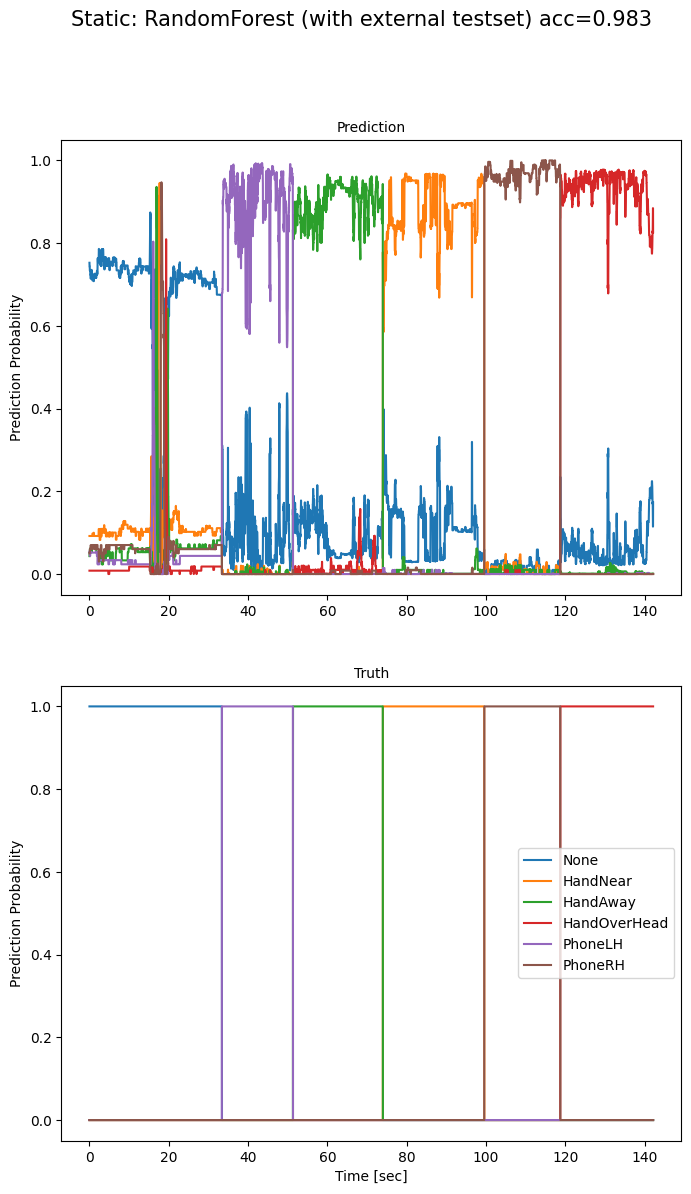

type of P_pred: <class 'numpy.ndarray'>
probability of predicted target: [[7.52513528e-01 9.20030549e-02 4.33466211e-02 8.14159308e-03
  5.38676344e-02 5.01275845e-02]
 [7.43389785e-01 9.20030549e-02 5.24703711e-02 8.14159308e-03
  5.38676344e-02 5.01275845e-02]
 [7.43389785e-01 9.20030549e-02 5.24703711e-02 8.14159308e-03
  5.38676344e-02 5.01275845e-02]
 ...
 [1.14641584e-01 0.00000000e+00 4.43359575e-04 8.84570241e-01
  0.00000000e+00 3.44827597e-04]
 [1.15858153e-01 0.00000000e+00 4.43359575e-04 8.83353651e-01
  0.00000000e+00 3.44827597e-04]
 [1.73022345e-01 0.00000000e+00 4.43359575e-04 8.26189458e-01
  0.00000000e+00 3.44827597e-04]]
true target: [0 0 0 ... 3 3 3]
Accuracy = 0.9829991792707234
Result: [ True  True  True ...  True  True  True]


In [18]:
# train model
cls_model = train_static_ML.main(ext_args=train_args)

In [19]:
# get misclassified index
cls_model.misclass_index()

These frames are misclassified:
[ 958  959  960  961  962  963  964  965  966  967  968  969 1008 1009
 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023
 1024 1025 1026 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044
 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058
 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072
 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086
 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100
 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114
 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128
 1157 1158 1159 1160 1161 1162 1163 1176 1177 1178 1179 1180 1181 1182
 1183 1184 1185 1186 1187]
